Завдання 1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv("bank-additional-full.csv", sep=";")
dataset.shape

(41188, 21)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
database.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Завдання 2

In [11]:
bank_target = dataset['y'].map({'no': 0, 'yes': 1})
bank_target

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

Завдання 3

In [13]:
bank_client = dataset[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

for column in bank_client.columns:
    unique_values = bank_client[column].unique()
    print(f"Column: {column}")
    print(f"Unique values:\n{unique_values}\n")

Column: age
Unique values:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Column: job
Unique values:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Column: marital
Unique values:
['married' 'single' 'divorced' 'unknown']

Column: education
Unique values:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Column: default
Unique values:
['no' 'unknown' 'yes']

Column: housing
Unique values:
['no' 'yes' 'unknown']

Column: loan
Unique values:
['no' 'yes' 'unknown']



Завдання 4

Minimum age: 17
Maximum age: 98
Number of NaN values in Age: 0


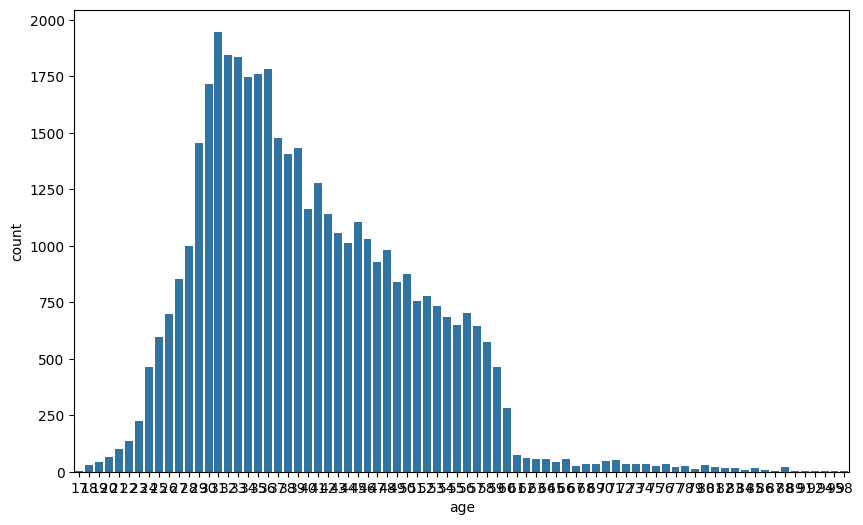

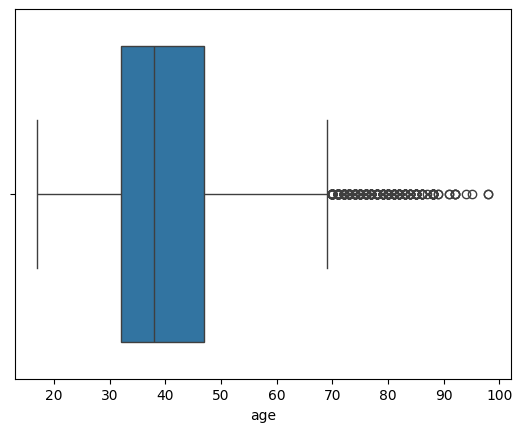

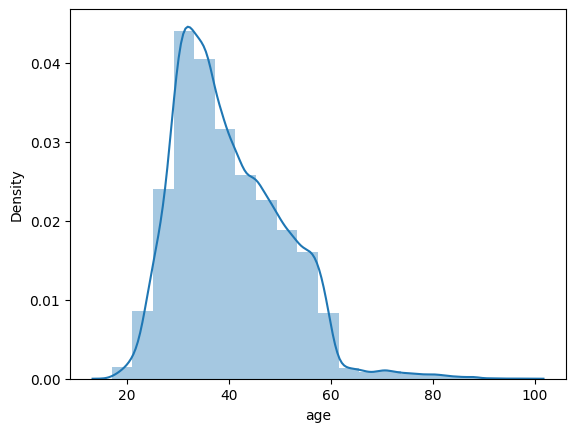

In [16]:
min_age = dataset['age'].min()
max_age = dataset['age'].max()
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

nan_age = dataset['age'].isna().sum()
print(f"Number of NaN values in Age: {nan_age}")

plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=dataset)
plt.show()

sns.boxplot(x='age', data=dataset)
plt.show()

sns.distplot(dataset['age'], kde=True, bins=20)
plt.show()


Висновки
Підготовка цільової змінної:
"y" визначає, чи підписав клієнт терміновий депозит. Для конвертації у числову змінну ми відображали "yes" на 1 і "no" на 0. Це дозволяє нам працювати з цільовою змінною в алгоритмах машинного навчання, які вимагають числового вводу.

Вибір та аналіз атрибутів клієнта:
Ми вибрали відповідні стовпці, що характеризують клієнтів банку, і дослідили унікальні значення в кожному атрибуті. Це дозволило нам отримати краще розуміння розподілу даних та ідентифікувати атрибути, які потребують попередньої обробки перед використанням у моделі машинного навчання.

Висновки з аналізу атрибуту "Age":
Мінімальний вік: Наймолодший клієнт у наборі даних - 17 років.
Максимальний вік: Найстарший клієнт у наборі даних - 98 років.
Немає NaN значень у Age.
Countplot Age: Найбільш поширені вікові групи серед клієнтів банку 25 - 40 років.
Важкі хвости у розподілі: розподіл Age має важкий хвіст

Завдання 5

In [20]:
def detect_outliers_with_interquantile_range(dataset: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(dataset[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = dataset[(dataset[column] > up_lim) | (dataset[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers

outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)



Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


Висновок:
За допомогою методу міжквартильного розмаху з 10-м та 90-м перцентилями як межами, ми ідентифікували два викиди в наборі даних з віком 98 років. Ці викиди перевищують обчислену верхню межу 95.5.

Завдання 6

In [ ]:
atributes = ['job', 'marital', 'education']

for atribute in atributes:
    fig, ax = plt.subplots(figsize=(15, 8))
    count_series = bank_client[atribute].value_counts()

    ax.bar(count_series.index, count_series.values, color='pink')

    ax.set_title(f'Distribution of {atribute}', fontsize=16)
    ax.set_xlabel(atribute.capitalize(), fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

    plt.show()

Завдання 7

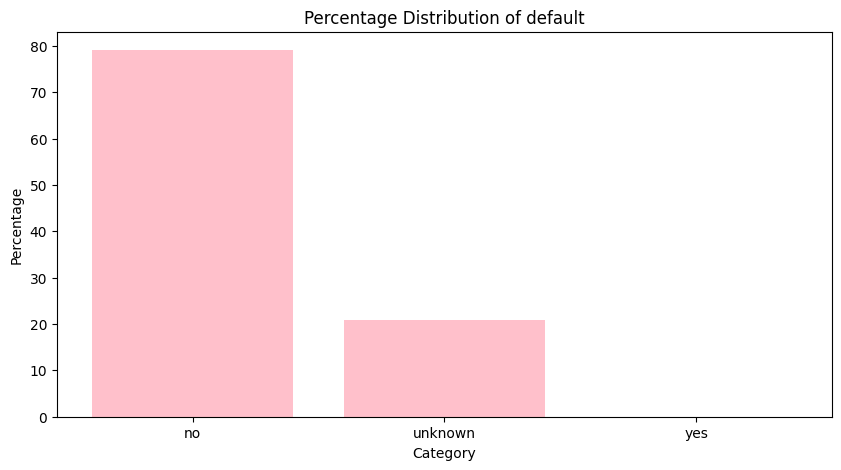

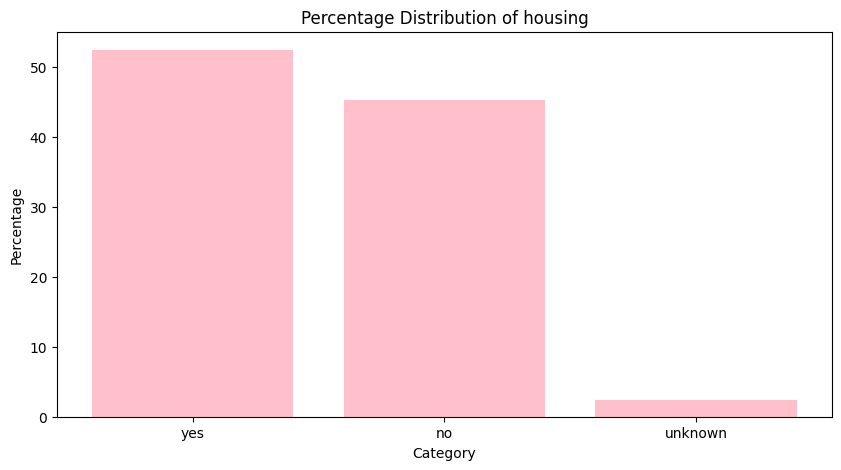

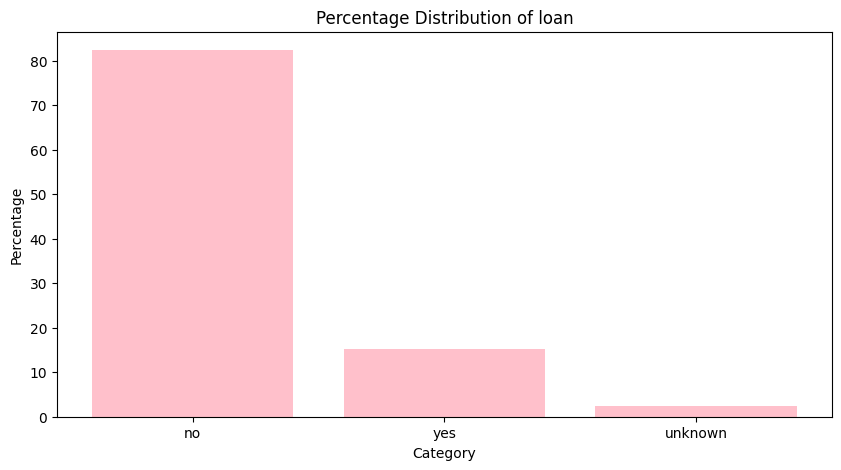

In [40]:
atributes = ['default', 'housing', 'loan']

for atribute in atributes:
    fig, ax = plt.subplots(figsize=(10, 5))

    value_counts = bank_client[atribute].value_counts(normalize=True) * 100

    ax.bar(value_counts.index.astype(str), value_counts.values, color='pink')

    ax.set_title(f'Percentage Distribution of {atribute}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Percentage')
    plt.show()

Завдання 8

In [42]:
def encode_categorical_columns(dataset: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder

    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode

    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = dataset[col][dataset[col].notnull()]
        le.fit(not_null)
        dataset[col] = le.transform(dataset[col])

    return dataset

bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing', 'loan'])

bank_client['loan']

0        0
1        0
2        0
3        0
4        2
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: loan, Length: 41188, dtype: int64

Завдання 9

In [44]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column using quartile values

    df: pd.DataFrame to encode
    age_col: age col to encode
    """
    q1 = dataset[age_col].quantile(0.25)
    q2 = dataset[age_col].quantile(0.5)
    q3 = dataset[age_col].quantile(0.75)

    dataset.loc[(dataset[age_col] <= q1), age_col] = 1
    dataset.loc[(dataset[age_col] > q1) & (dataset[age_col] <= q2), age_col] = 2
    dataset.loc[(dataset[age_col] > q2) & (dataset[age_col] <= q3), age_col] = 3
    dataset.loc[(dataset[age_col] > q3), age_col] = 4

    return dataset

bank_client = encode_age(bank_client, 'age')
bank_client['age']

0        4
1        4
2        2
3        3
4        4
        ..
41183    4
41184    3
41185    4
41186    3
41187    4
Name: age, Length: 41188, dtype: int64

Висновки:
1. Значення 1 показує, що вік особи належить до першого квартилю і представляє найнижчі 25% значень в цьому наборі даних. Значення 2 (другий квартиль) знаходиться в межах 25% до 50%. Індекс 3 (третій квартиль) вказує на те, що вік знаходиться у діапазоні від 50% до 75% від загальної кількості значень, рухаючись від найнижчого до найвищого.

Завдання 10

In [48]:
bank_relat = ['contact', 'month', 'day_of_week', 'duration']
bank_relation = bank_client[bank_relat]
display(bank_relation)

print(f"\nNaN values:\n{bank_relation.isnull().sum()} ")


,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
...,...,...,...,...
41183,cellular,nov,fri,334
41184,cellular,nov,fri,383
41185,cellular,nov,fri,189
41186,cellular,nov,fri,442



NaN values:
contact        0
month          0
day_of_week    0
duration       0
dtype: int64 


Завдання 11

In [49]:
bank_relat = dataset[['contact', 'month', 'day_of_week']]

for column in bank_relat.columns:
    unique_values = bank_relat[column].unique()
    print(f"Column: {column}")
    print(f"Unique values:\n{unique_values}\n")

Column: contact
Unique values:
['telephone' 'cellular']

Column: month
Unique values:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Column: day_of_week
Unique values:
['mon' 'tue' 'wed' 'thu' 'fri']



Завдання 12

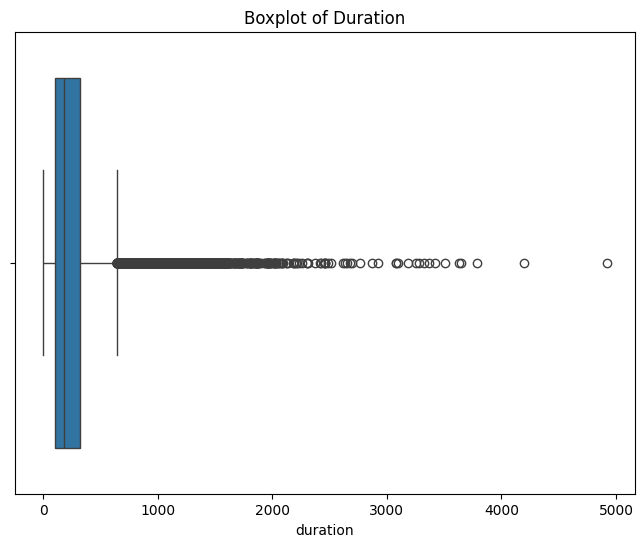

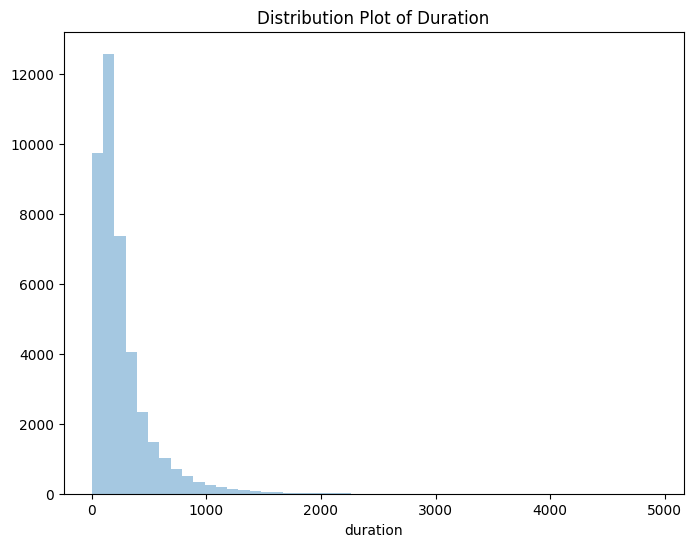

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=bank_relation['duration'])
plt.title('Boxplot of Duration')
plt.show()

plt.figure(figsize=(8, 6))
sns.distplot(bank_relation['duration'], kde=False)
plt.title('Distribution Plot of Duration')
plt.show()

Завдання 13

In [60]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder

    :param df: DataFrame to encode
    :param categorical_cols: List of specified columns to encode

    :return: DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    return df

bank_relat_encoded = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
bank_relat_encoded ['month']

0        6
1        6
2        6
3        6
4        6
        ..
41183    7
41184    7
41185    7
41186    7
41187    7
Name: month, Length: 41188, dtype: int64

Завдання 14

In [66]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding duration column using quartile values

    df: pd.DataFrame to encode
    duration_col: duration col to encode
    """
    q1 = dataset[duration_col].quantile(0.25)
    q2 = dataset[duration_col].quantile(0.5)
    q3 = dataset[duration_col].quantile(0.75)

    dataset.loc[(dataset[duration_col] <= q1), duration_col] = 1
    dataset.loc[(dataset[duration_col] > q1) & (dataset[duration_col] <= q2), duration_col] = 2
    dataset.loc[(dataset[duration_col] > q2) & (dataset[duration_col] <= q3), duration_col] = 3
    dataset.loc[(dataset[duration_col] > q3), duration_col] = 4

    return dataset

bank_relat = encode_duration(bank_relat, 'duration')

Завдання 15

In [68]:
bank_socec = dataset[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
print(bank_socec.head())

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0


Завдання 16

In [69]:
bank_other = dataset[['campaign', 'pdays', 'previous', 'poutcome']]
print(bank_other.head())

   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent


Завдання 17

In [75]:
bank_other = encode_categorical_columns(bank_other, ['poutcome'])
print(bank_other.head())

   campaign  pdays  previous  poutcome
0         1    999         0         1
1         1    999         0         1
2         1    999         0         1
3         1    999         0         1
4         1    999         0         1


Завдання 18

In [79]:
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis = 1)
print(bank_final.head())

   age        job  marital    education  default housing loan    contact  \
0    4  housemaid  married     basic.4y       no      no   no  telephone   
1    4   services  married  high.school  unknown      no   no  telephone   
2    2   services  married  high.school       no     yes   no  telephone   
3    3     admin.  married     basic.6y       no      no   no  telephone   
4    4   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...   y  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   may         mon  ...  no           1.1          93.994          -36.4   
1   may         mon  ...  no           1.1          93.994          -36.4   
2   may         mon  ...  no           1.1          93.994          -36.4   
3   may         mon  ...  no           1.1          93.994          -36.4   
4   may         mon  ...  no           1.1          93.994          -36.4   

  euribor3m  nr.employed  campaign  pdays  previous  poutcome  
0     4.857     

Завдання 19

In [97]:
job_columns = dataset.job.str.split(',', expand=True)
job_columns = job_columns.apply(LabelEncoder().fit_transform)
dataset = pd.concat([dataset.drop('job', axis=1), job_columns], axis=1)


In [104]:
X = dataset.drop('y', axis=1)
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold


In [101]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [102]:
def scale_the_data(X_train: pd.DataFrame,
                   X_test: pd.DataFrame):
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

In [106]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [120]:
unknown_cols = [col for col in X_train.columns if X_train[col].astype(str).str.contains('unknown').any()]
print(unknown_cols)

['default', 'housing', 'loan']


In [121]:
for col in unknown_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [128]:
le = LabelEncoder()
X_train['marital'] = le.fit_transform(X_train['marital'])
X_test['marital'] = le.transform(X_test['marital'])
X_train['education'] = le.fit_transform(X_train['education'])
X_test['education'] = le.transform(X_test['education'])
X_train['contact'] = le.fit_transform(X_train['contact'])
X_test['contact'] = le.transform(X_test['contact'])
X_train['month'] = le.fit_transform(X_train['month'])
X_test['month'] = le.transform(X_test['month'])
X_train['day_of_week'] = le.fit_transform(X_train['day_of_week'])
X_test['day_of_week'] = le.transform(X_test['day_of_week'])
X_train['poutcome'] = le.fit_transform(X_train['poutcome'])
X_test['poutcome'] = le.transform(X_test['poutcome'])


In [123]:
print(X_train.columns)


Index(['age', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', '0'],
      dtype='object')


In [129]:
X_train, X_test = scale_the_data(X_train, X_test)

In [130]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7131  172]
 [ 614  321]]
90.0


In [ ]:
neighbors = np.arange(0,25)
cv_scores = []

for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()



k=1 86.86 (+/- 0.36)
k=2 89.33 (+/- 0.43)
k=3 88.80 (+/- 0.31)
k=4 89.72 (+/- 0.39)
k=5 89.47 (+/- 0.36)
k=6 90.02 (+/- 0.32)
k=7 90.06 (+/- 0.33)
k=8 90.24 (+/- 0.35)
k=9 90.25 (+/- 0.36)
k=10 90.40 (+/- 0.41)
k=11 90.36 (+/- 0.46)
k=12 90.43 (+/- 0.42)
k=13 90.50 (+/- 0.46)
k=14 90.47 (+/- 0.43)
k=15 90.50 (+/- 0.40)
k=16 90.45 (+/- 0.42)
k=17 90.51 (+/- 0.38)


In [132]:

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[7169  134]
 [ 683  252]]
90.0


In [133]:

models = pd.DataFrame({
                'Models': ['Logistic Regression', 'KNN'],
                'Score':  [LOGCV, KNNCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Logistic Regression,0.904467
1,KNN,0.898153
